## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [ ]:
!pip install praw

1.2 라이브러리 설정

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [ ]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


In [ ]:
top_posts

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [ ]:
title_list = []
text_list = []
for post in top_posts:
    title_list.append(post.title)
    text_list.append(post.selftext)

data = {'Title' : title_list,
      'Text' : text_list
      }

df = pd.DataFrame(data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Why NVDA keeps going up?,WTF is going on with NVDA? It keeps going up a...
96,"Amazon spends $2.75B on AI startup Anthropic, ...",Amazon is making its largest outside investmen...
97,Bloomberg: Intel to Cut Thousands of Jobs to R...,Intel Corp. plans to eliminate thousands of jo...
98,"AMD vs NVDA, which one are you guys favoring r...",I’ve noticed that recently these two stocks be...


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [ ]:
# 소문자화 lower()
df['Title'] = df['Title'].apply(lambda x: x.lower())
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [ ]:
df

,Title,Text
0,a note to young investors (or new investors),as the fed caused a bit of a ripple in the mar...
1,to all of you who are red this year while the ...,lately i keep hearing the same old narrative f...
2,pelosi's husband buying over $1 million of com...,[full article](https://www.msn.com/en-us/tv/ne...
3,beware of what amc shorts are holding!,i understand that most people in this thread i...
4,blackberry -- a dormant giant,###**abbreviation index:**\n\nbb -- blackberry...
...,...,...
230,"here is a market recap for today thursday, nov...","**psychomarket recap - thursday, november 18, ..."
231,tsmc sales grow 45% in july on strong ai chip ...,(bloomberg) -- taiwan semiconductor manufactur...
232,"meta still the cheapest of the magnificent 7, ...",quick glance at some of the numbers for meta. ...
233,made 30% since i started trading 7 months ago ...,"hello folks, \n\ni am a 24 year old who starte..."


In [ ]:
! pip install contractions

In [ ]:
# 축약어 세부 토큰화 - contractions 라이브러리 사용
# don't / dont --> do, not
# that's / thats --> that, is

import contractions

df['Title'] = df['Title'].apply(lambda x: contractions.fix(x))
df['Text'] = df['Text'].apply(lambda x: contractions.fix(x))

In [ ]:
# 토큰화 - TweetTokenizer 사용
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df['Title'] = df['Title'].apply(lambda x: tokenizer.tokenize(x))
df['Text'] = df['Text'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df

,Title,Text
0,"[a, note, to, young, investors, (, or, new, in...","[as, the, fed, caused, a, bit, of, a, ripple, ..."
1,"[to, all, of, you, who, are, red, this, year, ...","[lately, i, keep, hearing, the, same, old, nar..."
2,"[pelosi's, husband, buying, over, $, 1, millio...","[[, full, article, ], (, https://www.msn.com/e..."
3,"[beware, of, what, amc, shorts, are, holding, !]","[i, understand, that, most, people, in, this, ..."
4,"[blackberry, -, -, a, dormant, giant]","[#, #, #, *, *, abbreviation, index, :, *, *, ..."
...,...,...
230,"[here, is, a, market, recap, for, today, thurs...","[*, *, psychomarket, recap, -, thursday, ,, no..."
231,"[tsmc, sales, grow, 45, %, in, july, on, stron...","[(, bloomberg, ), -, -, taiwan, semiconductor,..."
232,"[meta, still, the, cheapest, of, the, magnific...","[quick, glance, at, some, of, the, numbers, fo..."
233,"[made, 30, %, since, i, started, trading, 7, m...","[hello, folks, ,, i, am, a, 24, year, old, who..."


불용어 제거

In [ ]:
# the, a, I, me, have와 같은 불용어 제거 - nltk에서 정의하는 불용어에서 no, not 제외하고 제거하기!
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english')) - {'no','not'}

df['Title'] = df['Title'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['Text'] = df['Text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,Title,Text
0,"[note, young, investors, (, new, investors, )]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, &, p500, 30, %]","[lately, keep, hearing, old, narrative, beat-d..."
2,"[pelosi's, husband, buying, $, 1, million, com...","[[, full, article, ], (, https://www.msn.com/e..."
3,"[beware, amc, shorts, holding, !]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, -, -, dormant, giant]","[#, #, #, *, *, abbreviation, index, :, *, *, ..."
...,...,...
230,"[market, recap, today, thursday, ,, november, ...","[*, *, psychomarket, recap, -, thursday, ,, no..."
231,"[tsmc, sales, grow, 45, %, july, strong, ai, c...","[(, bloomberg, ), -, -, taiwan, semiconductor,..."
232,"[meta, still, cheapest, magnificent, 7, ,, wro...","[quick, glance, numbers, meta, ., eps, crazy, ..."
233,"[made, 30, %, since, started, trading, 7, mont...","[hello, folks, ,, 24, year, old, started, work..."


In [ ]:
# 영문자 외의 문자 제거
import re

df['Title'] = df['Title'].apply(lambda tokens: [word for word in tokens if word.isalpha()])
df['Text'] = df['Text'].apply(lambda tokens: [word for word in tokens if word.isalpha()])

In [ ]:
df

,Title,Text
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year]","[lately, keep, hearing, old, narrative, invest..."
2,"[husband, buying, million, computer, chip, sto...","[full, article, paul, pelosi, house, speaker, ..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."
...,...,...
230,"[market, recap, today, thursday, november]","[psychomarket, recap, thursday, november, stoc..."
231,"[tsmc, sales, grow, july, strong, ai, chip, de...","[bloomberg, taiwan, semiconductor, manufacturi..."
232,"[meta, still, cheapest, magnificent, wrong]","[quick, glance, numbers, meta, eps, crazy, goo..."
233,"[made, since, started, trading, months, ago, c...","[hello, folks, year, old, started, working, ba..."


비정형적 표현 수정

In [ ]:
# 무의미하게 반복된 철자 수정 - 같은 철자가 세번 이상 반복되지 않도록

In [ ]:
# 슬랭 단어 확장 - 3,4,5,6

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [ ]:
# 모든 리스트 요소를 1차원 리스트로 통합
all_word_list = [word for sublist in df['Title'] + df['Text'] for word in sublist]

# 결과 출력
print(all_word_list)

['note', 'young', 'investors', 'new', 'investors', 'fed', 'caused', 'bit', 'ripple', 'market', 'today', 'considered', 'vacating', 'position', 'ultimately', 'not', 'thought', 'little', 'bit', 'journey', 'years', 'thought', 'would', 'share', 'story', 'things', 'learned', 'back', 'made', 'first', 'move', 'stock', 'market', 'taking', 'tax', 'return', 'buying', 'shares', 'coal', 'company', 'called', 'consol', 'time', 'traded', 'symbol', 'cnx', 'bought', 'almost', 'no', 'dd', 'simply', 'paid', 'pretty', 'good', 'dividend', 'around', 'share', 'recall', 'correctly', 'back', 'internet', 'trading', 'really', 'not', 'thing', 'bought', 'bank', 'trade', 'cost', 'actually', 'call', 'broker', 'bank', 'place', 'trade', 'phone', 'ancient', 'times', 'right', 'lol', 'figured', 'win', 'lose', 'draw', 'eventually', 'stock', 'pay', 'dividend', 'not', 'follow', 'market', 'much', 'really', 'holding', 'dividend', 'realized', 'couple', 'years', 'later', 'climbed', 'around', 'hit', 'decided', 'sell', 'still', 'b

In [ ]:
! pip install wordcloud matplotlib

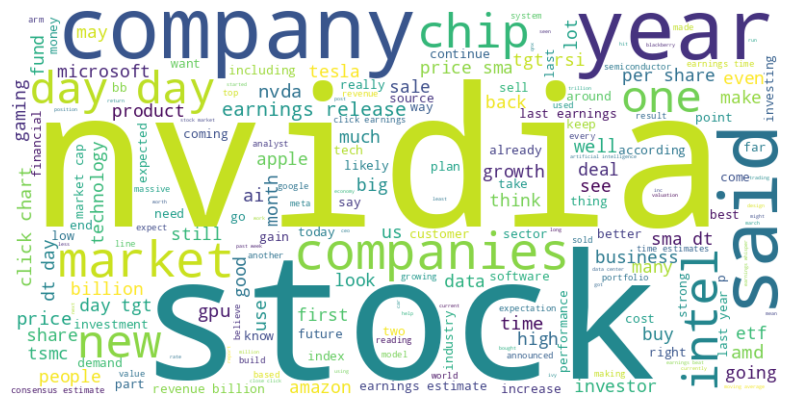

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 리스트를 문자열로 변환
texts = ' '.join(all_word_list)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

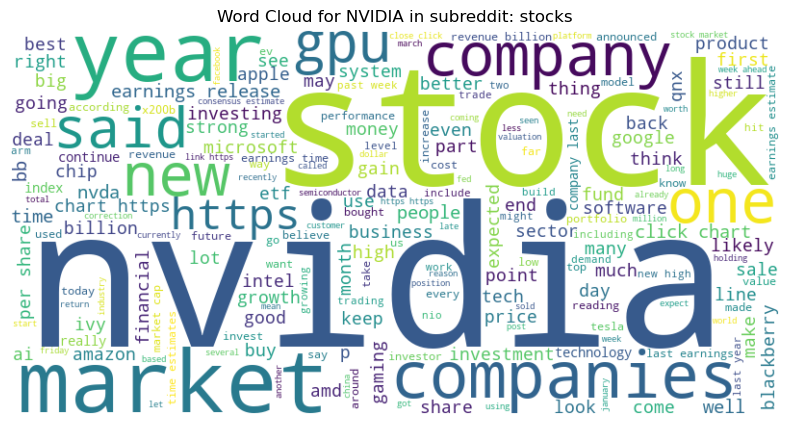

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

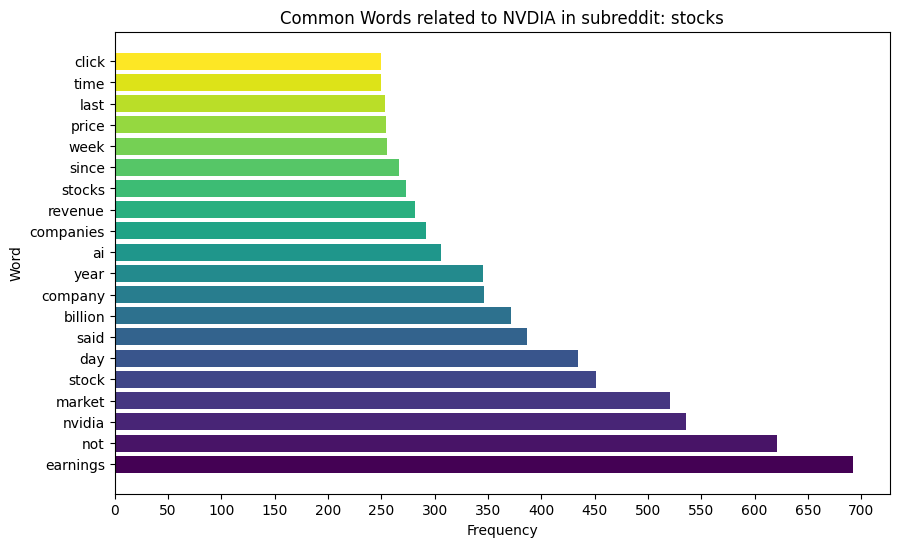

In [ ]:
from collections import Counter
import numpy as np

word_count = Counter(all_word_list)
high_freq_word = word_count.most_common(20)

word, count = zip(*high_freq_word)

# 그라데이션 색상 생성
colors = plt.cm.viridis(np.linspace(0, 1, len(word)))

plt.figure(figsize=(10, 6))
plt.barh(word, count, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Common Words related to NVDIA in subreddit: stocks')
plt.xticks(range(0, max(count) + 50, 50))
plt.show()

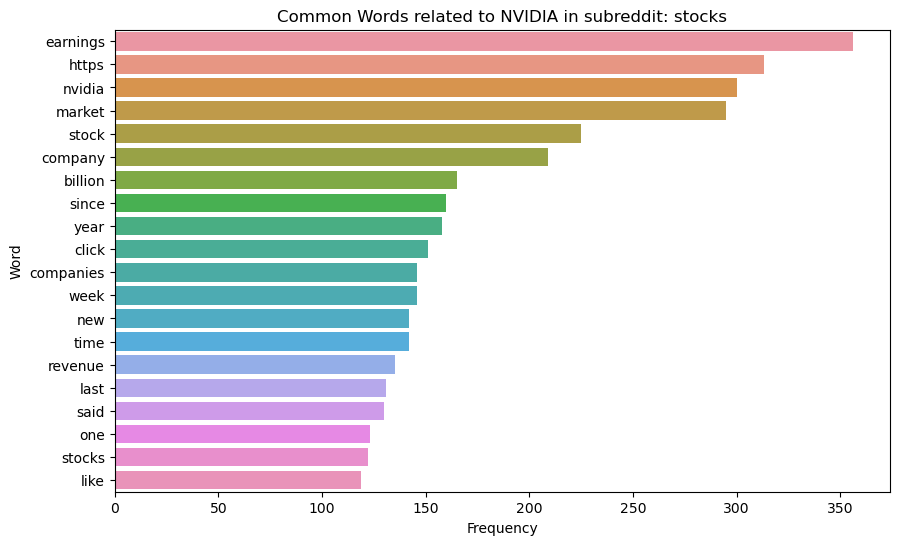

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [ ]:
# 두 컬럼을 병합하여 새로운 리스트 생성
df['Merged Texts'] = df.apply(lambda row: row['Title'] + row['Text'], axis=1)

# 새로운 데이터프레임 생성
new_df = df[['Merged Texts']]

# 결과 출력
new_df

,Merged Texts
0,"[note, young, investors, new, investors, fed, ..."
1,"[red, year, lately, keep, hearing, old, narrat..."
2,"[husband, buying, million, computer, chip, sto..."
3,"[beware, amc, shorts, holding, understand, peo..."
4,"[blackberry, dormant, giant, abbreviation, ind..."
...,...
230,"[market, recap, today, thursday, november, psy..."
231,"[tsmc, sales, grow, july, strong, ai, chip, de..."
232,"[meta, still, cheapest, magnificent, wrong, qu..."
233,"[made, since, started, trading, months, ago, c..."


- VADER: 주로 소설 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지

- `compound` 점수를 기준으로 긍정/부정 분류. 단어별 감정 점수를 합산한 값으로, 텍스트의 전반적인 감정을 요약한 지표.

In [ ]:
print(df['Merged Texts'][0])

['note', 'young', 'investors', 'new', 'investors', 'fed', 'caused', 'bit', 'ripple', 'market', 'today', 'considered', 'vacating', 'position', 'ultimately', 'not', 'thought', 'little', 'bit', 'journey', 'years', 'thought', 'would', 'share', 'story', 'things', 'learned', 'back', 'made', 'first', 'move', 'stock', 'market', 'taking', 'tax', 'return', 'buying', 'shares', 'coal', 'company', 'called', 'consol', 'time', 'traded', 'symbol', 'cnx', 'bought', 'almost', 'no', 'dd', 'simply', 'paid', 'pretty', 'good', 'dividend', 'around', 'share', 'recall', 'correctly', 'back', 'internet', 'trading', 'really', 'not', 'thing', 'bought', 'bank', 'trade', 'cost', 'actually', 'call', 'broker', 'bank', 'place', 'trade', 'phone', 'ancient', 'times', 'right', 'lol', 'figured', 'win', 'lose', 'draw', 'eventually', 'stock', 'pay', 'dividend', 'not', 'follow', 'market', 'much', 'really', 'holding', 'dividend', 'realized', 'couple', 'years', 'later', 'climbed', 'around', 'hit', 'decided', 'sell', 'still', 'b

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(' '.join(df['Merged Texts'][0]))
print(senti_scores)

{'neg': 0.089, 'neu': 0.72, 'pos': 0.191, 'compound': 0.9937}


compound가 약 0.99가 나온 것으로 보아 긍정감성으로 분류됨

In [ ]:
# 주식 관련 부정적인 표현 키워드 정의
negative_keywords = ['loss', 'down', 'crash', 'panic', 'sell', 'regret']

# 조건에 맞는 행 찾기
def contains_negative_expression(text):
    # "no" 또는 "not"이 포함되어 있는지 확인
    if any(word in text for word in ['no', 'not']):
        # 주식 관련 부정적인 표현이 포함되어 있는지 확인
        if any(word in text for word in negative_keywords):
            return True
    return False

# 부정적 표현을 포함한 행의 인덱스 찾기
negative_indices = df[df['Merged Texts'].apply(lambda x: contains_negative_expression(' '.join(x)))].index

# 결과 출력
print(negative_indices.tolist())

[0, 3, 4, 5, 6, 7, 15, 17, 19, 30, 31, 36, 40, 42, 44, 46, 48, 52, 54, 58, 59, 63, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 88, 91, 93, 96, 98, 101, 102, 105, 107, 109, 110, 111, 114, 115, 117, 119, 123, 126, 127, 130, 135, 137, 139, 143, 147, 148, 155, 160, 170, 173, 178, 180, 181, 186, 193, 196, 205, 206, 208, 210, 214, 219, 220, 223, 226, 227, 228, 230, 233]


In [ ]:
print(df['Merged Texts'][44])

['nvda', 'another', 'painful', 'lesson', 'selling', 'said', 'numerous', 'times', 'sub', 'painful', 'mistake', 'investing', 'career', 'far', 'selling', 'prematurely', 'human', 'still', 'occasionally', 'make', 'stupid', 'mistake', 'bought', 'nvda', 'year', 'ago', 'around', 'watched', 'horror', 'dropped', 'low', 'almost', 'patiently', 'held', 'started', 'rebound', 'nicely', 'late', 'last', 'year', 'started', 'getting', 'concerned', 'hearing', 'lots', 'people', 'talk', 'supply', 'glut', 'chips', 'valuation', 'concerns', 'blah', 'blah', 'blah', 'decided', 'cut', 'losses', 'around', 'back', 'right', 'purchase', 'price', 'yet', 'another', 'painful', 'reminder', 'long', 'term', 'investors', 'reason', 'sell', 'unless', 'really', 'need', 'capital', 'thesis', 'making', 'investment', 'first', 'place', 'no', 'longer', 'applies', 'not', 'sell', 'macro', 'concerns', 'hypothetical', 'risks', 'valuation']


In [ ]:
senti_scores = senti_analyzer.polarity_scores(' '.join(df['Merged Texts'][44]))
print(senti_scores)

{'neg': 0.314, 'neu': 0.66, 'pos': 0.026, 'compound': -0.9795}


compund -0.9795로, 부정으로 분류됨

In [ ]:
print(df['Merged Texts'][3])

['beware', 'amc', 'shorts', 'holding', 'understand', 'people', 'thread', 'invest', 'safely', 'not', 'willing', 'risk', 'money', 'risky', 'play', 'like', 'short', 'squeeze', 'however', 'would', 'recommend', 'everyone', 'least', 'acknowledge', 'short', 'squeeze', 'potentially', 'happening', 'could', 'potentially', 'continue', 'happen', 'means', 'weary', 'hedge', 'funds', 'shorting', 'amc', 'moment', 'long', 'positions', 'amc', 'gme', 'begin', 'cause', 'hedge', 'funds', 'get', 'margin', 'called', 'liquidated', 'might', 'flash', 'crash', 'biggest', 'named', 'stocks', 'list', 'institutional', 'short', 'sellers', 'amc', 'top', 'long', 'positions', 'aware', 'citadel', 'right', 'side', 'cash', 'value', 'x', 'spy', 'spdr', 'p', 'etf', 'trust', 'instance', 'billion', 'spy', 'tsla', 'tesla', 'motors', 'inc', 'tsla', 'tesla', 'motors', 'inc', 'spy', 'spdr', 'p', 'etf', 'trust', 'amzn', 'inc', 'qqq', 'powershares', 'qqq', 'trust', 'amzn', 'inc', 'qqq', 'powershares', 'qqq', 'trust', 'aapl', 'apple'

In [ ]:
senti_scores = senti_analyzer.polarity_scores(' '.join(df['Merged Texts'][3]))
print(senti_scores)

{'neg': 0.027, 'neu': 0.765, 'pos': 0.208, 'compound': 0.9954}


텍스트만 봤을 때 부정에 가까운 경우도 VADER 기준 긍정 표현의 비중이 높다고 판단된 경우

--> 추가적인 전처리 또는 다른 모델 사용 고려